# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [ ]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [ ]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [ ]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [ ]:
X = boston.data
y = boston.target

# 3. Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,  test_size = 0.25 , shuffle= False)

# 4. Simple Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

linearModel.score(x_train, y_train)

0.7293173664231581

In [ ]:
linearModel.score(x_test, y_test)

-1.3539860862359574

# 5. Ridge Regularization for Linear Model

In [ ]:
from sklearn.linear_model import Ridge
modelr = Ridge(alpha = 100)
modelr.fit(x_train, y_train)
modelr.score(x_train,y_train)

0.695221935638914

In [ ]:
modelr.score(x_test,y_test)

-0.6155438037510057

# 6. Lasso Regularization for Linear Model

In [ ]:
from sklearn.linear_model import Lasso
modell = Ridge(alpha = 1)
modell.fit(x_train, y_train)
modell.score(x_train,y_train)

0.7272618313592534

# 7. Polynomial Regression of degree 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)

xtrain_poly = pf.fit_transform(x_train)
xtest_poly = pf.fit_transform(x_test)

Linear regression

In [ ]:
lrp = LinearRegression()
lrp.fit(xtrain_poly,y_train)
lrp.score(xtrain_poly, y_train)

0.6572919796833349

In [ ]:
lrp.score(xtest_poly, y_test)

-1736.9512761953622

# 8. Ridge Regularization for Polynomial model

In [ ]:
modelrp = Ridge(alpha = 10000)
modelrp.fit(xtrain_poly,y_train)
modelrp.score(xtrain_poly, y_train)

0.8937736489576918

In [ ]:
modelrp.score(xtest_poly, y_test)

-130.73529838879168

# 9. Lasso Regularization for Polynomial model

In [ ]:
modelrpl = Lasso(alpha = 1)
modelrpl.fit(xtrain_poly,y_train)
modelrpl.score(xtrain_poly, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.827e+03, tolerance: 2.929e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8943958359487699

In [ ]:
modelrpl.score(xtest_poly, y_test)

-145.01747688927932

# 10. Select K Best

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kb = SelectKBest(score_func = f_regression,k=7)

x_selected = kb.fit_transform(x_train, y_train)
x_selected.shape

(379, 7)

In [ ]:
lrk = LinearRegression()
lrk.fit(x_selected, y_train)
lrk.score(x_selected, y_train)

0.6558778031591697

In [ ]:
columns = ['LSTAT','ZN','INDUS','RM','TAX','PTRATIO']

tdf = pd.DataFrame(x_test, columns = boston.feature_names)
tdf

CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0    17.86670  0.0  18.10   0.0  0.671  6.223  100.0  1.3861  24.0  666.0   
1    88.97620  0.0  18.10   0.0  0.671  6.968   91.9  1.4165  24.0  666.0   
2    15.87440  0.0  18.10   0.0  0.671  6.545   99.1  1.5192  24.0  666.0   
3     9.18702  0.0  18.10   0.0  0.700  5.536  100.0  1.5804  24.0  666.0   
4     7.99248  0.0  18.10   0.0  0.700  5.520  100.0  1.5331  24.0  666.0   
..        ...  ...    ...   ...    ...    ...    ...     ...   ...    ...   
122   0.06263  0.0  11.93   0.0  0.573  6.593   69.1  2.4786   1.0  273.0   
123   0.04527  0.0  11.93   0.0  0.573  6.120   76.7  2.2875   1.0  273.0   
124   0.06076  0.0  11.93   0.0  0.573  6.976   91.0  2.1675   1.0  273.0   
125   0.10959  0.0  11.93   0.0  0.573  6.794   89.3  2.3889   1.0  273.0   
126   0.04741  0.0  11.93   0.0  0.573  6.030   80.8  2.5050   1.0  273.0   

     PTRATIO       B  LSTAT  
0       20.2  393.74  21.78  
1       20.2  396.90  17.21  
2       20.2  396.90  21.08  
3       20.2  396.90  23.60  
4       20.2  396.90  24.56  
..       ...     ...    ...  
122     21.0  391.99   9.67  
123     21.0  396.90   9.08  
124     21.0  396.90   5.64  
125     21.0  393.45   6.48  
126     21.0  396.90   7.88  

[127 rows x 13 columns]

In [ ]:
traindf = pd.DataFrame(data = x_train)

In [ ]:
traindf = pd.DataFrame(data = x_train, columns = boston.feature_names )
traindf['target'] = y_train
traindf.head()



CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [ ]:
corr = traindf.corr()

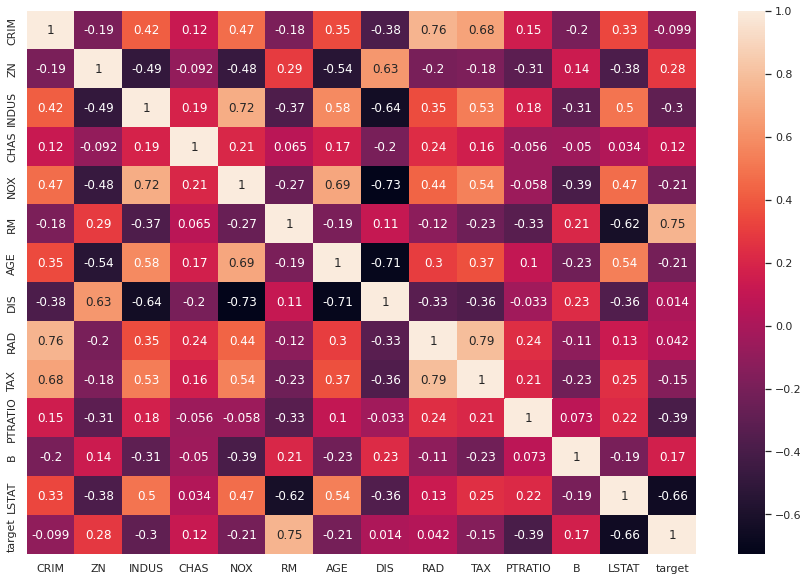

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr, annot =True)
plt.show()

In [ ]:
selected_columns =['CRIM','RM','']

In [ ]:
train_selected = traindf[selected_columns]
test_selected = tdf[selected_columns]
test_selected.head()

NameError: ignored

# 11. Conclusion

 Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting.
In today's lesson we learned about Ridge regression and Lasso regression. Ridge and lasso regression allow you to regularize ("shrink") coefficients. This means that the estimated coefficients are pushed towards 0, to make them work better on new data-sets ("optimized for prediction"). This allows you to use complex models and avoid over-fitting at the same time.